# Program 7 - Data Visualization: Pair Plot

In this program assignment, you will write your code to draw a pairplot on a given `iris.csv` data (**without using seaborn package**). In another word, you will implement a pairplot method, similar to what seaborn provides.  To complete this program, you may procede the following steps:
 - Step 1: Draw KDE plots
 - Step 2: Draw scatter plots
 - Step 3: Put them together

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Step 0: Loading Dataset

In [3]:
import pandas as pd
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import seaborn as sns
#sns.set(style="white", color_codes=True)

In [4]:
# Load the Iris flower dataset
iris=sns.load_dataset('iris')
type(iris)

pandas.core.frame.DataFrame

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
sns.pairplot(iris, hue='species')

In [7]:
# display column feature columns (all columns except the last one) and class column (last column)
print("Feature columns: \n", iris.columns[:-1])
print("Class column: ", iris.columns[-1])

Feature columns: 
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
Class column:  species


## Step 1: Drawing KDE Plots (4 points) 

You need to draw four kde plots like the followings:

<img src="kdes.png" style="width: 800px;">

**Detailed requirements:**
- You need to use each iris column ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] data to draw its KDE plot.
- Each KDE plot should have three KDE subplots, Each subplot is a KDE plot (grouped by species, which the last column of iris data).
- Each plot should be labeled and displayed in a nice view (considering using subplots)
- You may use a loop to to iterate each column data to draw each kde. To do so,
 - You may use pandas `groupby` function (on species) so that each column's data will be split into three parts.
 - Each of three splited data will be used to build a KDE function (you may review my KDE demo code)
 - Use `linespace` function to generate `x` for your kde plot, which is a `np` array, containing 1000 values range from `min` to `max` value, where `min` and `max` can be obtained through `min()` and `max()` on the column data.

**Note**:
- You will get partial points if you use `sns.FacetGrid` to do KDE plots.
- You will get partial points if you cannot draw KDE plots that are separated by species.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


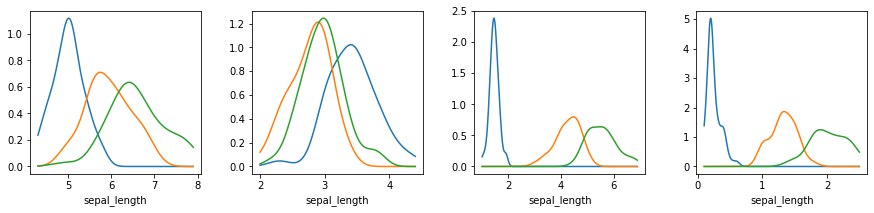

In [8]:
from scipy import stats

dfs = [x for _, x in iris.groupby('species')]


setosa = iris[iris['species'] == 'setosa']
display(setosa)


arr = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
fig = plt.figure(figsize=(15, 3))
grid = plt.GridSpec(1, 4, hspace=0.2, wspace=0.3)

for i in range(4):
    ax1 = fig.add_subplot(grid[0, i]) 

    kde = stats.gaussian_kde(dfs[0][arr[i]])
    xx = np.linspace(min(iris[arr[i]]), max(iris[arr[i]]), 1000)
    ax1.plot(xx, kde(xx))

    kde = stats.gaussian_kde(dfs[1][arr[i]])
    xx = np.linspace(min(iris[arr[i]]), max(iris[arr[i]]), 1000)
    ax1.plot(xx, kde(xx))

    kde = stats.gaussian_kde(dfs[2][arr[i]])
    xx = np.linspace(min(iris[arr[i]]), max(iris[arr[i]]), 1000)
    ax1.plot(xx, kde(xx))
    ax1.set_xlabel('sepal_length')





## Step 2: Drawing Scatter Plots (3 points)

You need to draw three scatter plots like the followings:

<img src="scatterplots.png" style="width: 800px;">

**Detailed requirements:**
- For each scatter plot, x-axis will be `sepal_length`. y-axis will be `sepal_width` (first plot),  `petal_length` (second plot),  or `petal_width` (third plot). 
- Each plot should be labeled and displayed in a nice view (considering using subplots)
- For each plot, you may use pandas `groupby` function (on species) so that each both column's data will be split into three parts to be fed into scatter plot's (x, y) values

**Note**:
- You will get partial points if you cannot draw scatter plots that are separated by species.

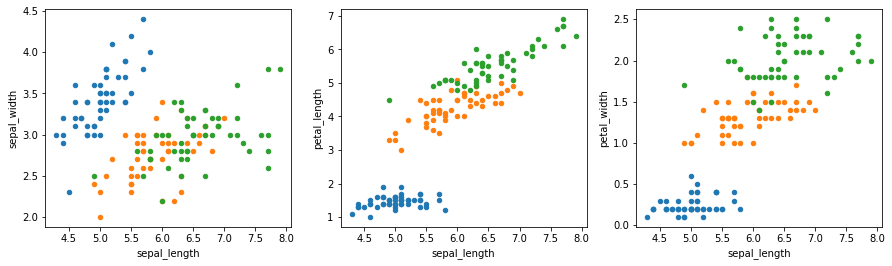

In [42]:
dfs = [x for _, x in iris.groupby('species')]
fig = plt.figure(figsize=(15, 4))
grid = plt.GridSpec(1, 3, hspace=0.2, wspace=0.2)

ax1 = fig.add_subplot(grid[0, 0])
ax1.set_xlabel('sepal_length')
ax1.set_ylabel('sepal_width')
for i in range(3):
    ax1 = plt.scatter(dfs[i]['sepal_length'], dfs[i]['sepal_width'], s=20)    

ax2 = fig.add_subplot(grid[0, 1])
ax2.set_xlabel('sepal_length')
ax2.set_ylabel('petal_length')
for i in range(3):
    ax2 = plt.scatter(dfs[i]['sepal_length'], dfs[i]['petal_length'], s=20)

    
ax3 = fig.add_subplot(grid[0, 2])
ax3.set_xlabel('sepal_length')
ax3.set_ylabel('petal_width')
for i in range(3):
    ax3 = plt.scatter(dfs[i]['sepal_length'], dfs[i]['petal_width'], s=20)

## Step 3: Put them together  (4 points) 

Your final pair plot should like the following:

<img src="pairplot.png" style="width: 800px;">

**Detailed requirements:**
- The diagonal plots should be KDE plots, while off-diagonal plots should be scatter plots.
- You should use two loops to acomplish this step, an outer loop to control rows and an inner loop to control columns.
 - For each individual plot, you still need to use `groupby` function (on species) to get three splitted dataset for plotting.
- You may use most of code from steps 1 and 2, depending how you implemented in step 1 and 2. 
- Additional modifications:
 - Remove top and right boarders for each plot (https://www.kite.com/python/answers/how-to-remove-the-frame-from-a-matplotlib-figure-in-python)
 - Add y-axis labels for the first column's plots, add x-axis labels for the last row's plots
 - Leave y-axis ticks on only for the first column's plots, x-axis ticks on only for the last row's plots.

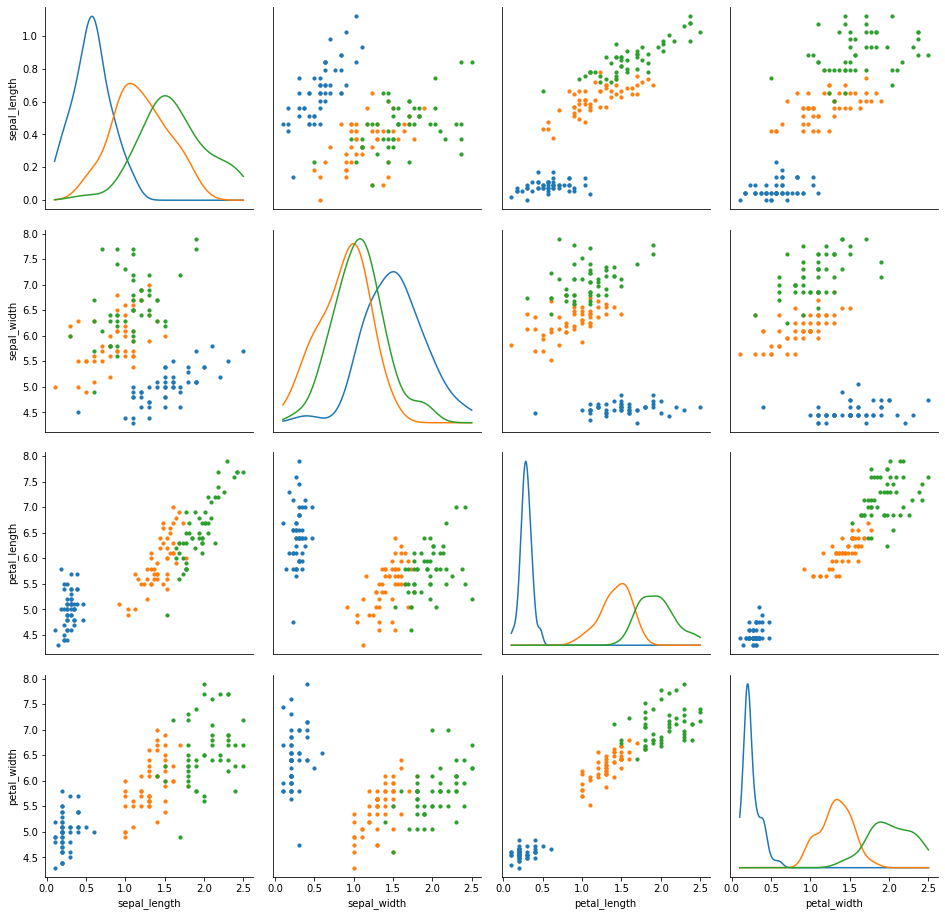

In [44]:
from scipy import stats

fig = plt.figure(figsize=(16, 16))
grid = plt.GridSpec(4, 4, hspace=0.1, wspace=0.1)
arr = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i in range(4):
    for j in range(4):
        ax = fig.add_subplot(grid[i, j])
        right_side = ax.spines["right"]
        top_side = ax.spines["top"]
        right_side.set_visible(False)
        top_side.set_visible(False)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        if(i == 3):
            ax.set_xlabel(arr[j])
            ax.get_xaxis().set_visible(True)
        if(j == 0):
            ax.set_ylabel(arr[i])
            ax.get_yaxis().set_visible(True)
        if(i == j):
            for k in range(3):
                ax = fig.add_subplot(grid[j, i]) 
                kde = stats.gaussian_kde(dfs[k][arr[i]])
                xx = np.linspace(min(iris[arr[i]]), max(iris[arr[i]]), 1000)
                ax.plot(xx, kde(xx))
            if(not j == 0):
                ax.get_yaxis().set_visible(False)
        else:
            for k in range(3):      
                ax = plt.scatter(dfs[k][arr[i]], dfs[k][arr[j]], s=10)

                    
